# INTRODUCCIÓN A DEEP LEARNING 

## ¿Qué es el aprendizaje profundo?

* Algunos de los avances más impresionantes en inteligencia artificial de los últimos años se han producido en el campo del aprendizaje profundo. 

* El procesamiento del lenguaje natural, el reconocimiento de imágenes y los juegos son tareas en las que los modelos de aprendizaje profundo se han acercado o incluso superado el rendimiento a nivel humano.

* ¿Qué es el aprendizaje profundo? El aprendizaje profundo es un enfoque del aprendizaje automático que ha permitido identificar tipos de patrones complejos y jerárquicos que se encuentran en los conjuntos de datos más desafiantes del mundo real.

El objetivo principal es presentar un proyecto sencillo de Deep Learning y practicar los principales usos de bibliotecas como `keras` o `tensorflow`.

# Load Data


In [1]:
#!pip install tensorflow

In [ ]:
# first neural network with keras tutorial

from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Validation dataset
val = pd.read_csv("twitter_validation.csv", header = None)

#Full dataset for Train-Test
train = pd.read_csv("twitter_training.csv", header = None)

In [14]:
#
train.head()

0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

Posteriormente, cambiamos el nombre de las columnas para representar los datos proporcionados de los tweets. 

In [15]:
#
train.columns = ['id','information','type','text']

train.head()

id  information      type  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [16]:
#

train.shape

(74682, 4)

In [17]:
#
val.columns = ['id','information','type','text']

val.head()

id information        type  \
0  3364    Facebook  Irrelevant   
1   352      Amazon     Neutral   
2  8312   Microsoft    Negative   
3  4371       CS-GO    Negative   
4  4433      Google     Neutral   

                                                text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...

In [18]:
#

val.shape

(1000, 4)

In [19]:
#

train_data = train

train_data.head()

id  information      type  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [20]:
#

val_data = val

val_data.head()

id information        type  \
0  3364    Facebook  Irrelevant   
1   352      Amazon     Neutral   
2  8312   Microsoft    Negative   
3  4371       CS-GO    Negative   
4  4433      Google     Neutral   

                                                text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...

Para preparar los datos para el análisis de texto, se crea una fila adicional utilizando el método `str.lower`. 

Sin embargo, como había algunos textos con valores únicamente numéricos (por ejemplo, casos en los que se twittea sólo números) se utilizó una función para transformar todos los datos a cadena.

Luego, una expresión regular borró los caracteres especiales ya que es común tener problemas de digitalización en Twitter.

In [21]:
#Text transformation

train_data["lower"] = train_data.text.str.lower() #lowercase

train_data["lower"] = [str(data) for data in train_data.lower] #converting all to string

In [22]:
#

train_data["lower"] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

# [^A-Za-z0-9 ]+: Esta expresión regular selecciona cualquier carácter que no sea una letra alfabética 
#      (mayúscula o minúscula), un número o un espacio en blanco. El símbolo ^ al inicio dentro de los 
#      corchetes indica "cualquier carácter que no sea uno de los siguientes".
# ' ': Los caracteres seleccionados por la expresión regular se reemplazan por un espacio en blanco.
# x: Es el texto sobre el cual se aplica la expresión regular y la sustitución.

In [23]:
#Text transformation

val_data["lower"] = val_data.text.str.lower() #lowercase

val_data["lower"] = [str(data) for data in val_data.lower] #converting all to string

val_data["lower"] = val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [24]:
# Las diferencias entre las dos columnas de texto se presentan en la siguiente tabla.

train_data.head()

id  information      type  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                               lower  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

# Plotting features

Para identificar las palabras principales que se utilizaron por etiqueta, se utilizó una **nube de palabras** para ver cuáles son las palabras más importantes en los datos de entrenamiento. 

Por ejemplo, en la etiqueta positiva palabras como amor y juego se utilizaron mayoritariamente junto con una amplia variedad de palabras clasificadas como "buenos sentimientos".

## Positive

In [29]:
#

word_cloud_text = ' '.join( train_data[ train_data["type"] == "Positive" ].lower )

word_cloud_text

'im getting on borderlands and i will murder you all   i am coming to the borders and i will kill you all  im getting on borderlands and i will kill you all  im coming on borderlands and i will murder you all  im getting on borderlands 2 and i will murder you me all  im getting into borderlands and i can murder you all  so i spent a few hours making something for fun      if you don t know i am a huge  borderlands fan and maya is one of my favorite characters  so i decided to make myself a wallpaper for my pc    here is the original image versus the creation i made   enjoy  pic twitter com mlsi5wf9jg so i spent a couple of hours doing something for fun  if you don t know that i m a huge   borderlands fan and maya is one of my favorite characters  i decided to make a wallpaper for my pc  here s the original picture compared to the creation i made  have fun  pic twitter com   mlsi5wf9jg so i spent a few hours doing something for fun  if you don t know i m a huge   borderlands fan and may

In [35]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )


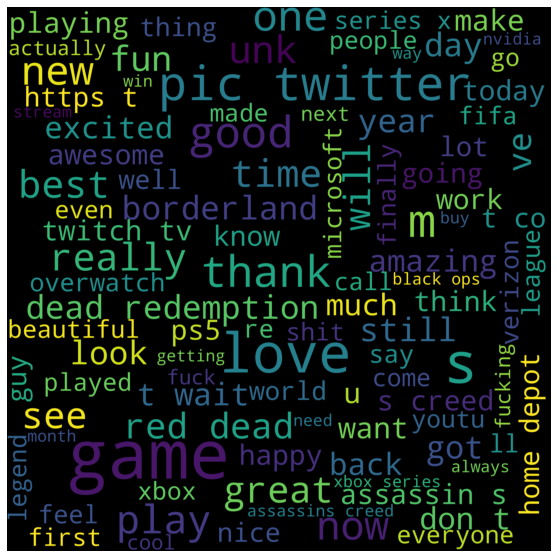

In [36]:
# Figure properties

plt.figure( figsize = ( 10, 10 ) )

plt.imshow( wordcloud, interpolation = "bilinear" )

plt.axis("off")

plt.show()

## Negative

In [37]:
#

word_cloud_text = ' '.join(train_data[train_data["type"] == "Negative"].lower)

word_cloud_text

'the biggest dissappoinment in my life came out a year ago fuck borderlands 3 the biggest disappointment of my life came a year ago  the biggest disappointment of my life came a year ago  the biggest dissappoinment in my life coming out a year ago fuck borderlands 3 for the biggest male dissappoinment in my life came hanging out a year time ago fuck borderlands 3 the biggest dissappoinment in my life came back last year ago fuck borderlands last man gearbox really needs to fix this dissapointing drops in the new borderlands 3 dlc cant be fine to farm bosses on mayhem 10 to get 1 legendary drop while anywhere else i get 6 10 drops    really sucks alot man gearbox really needs to fix these disappointing drops in the new borderlands 3 dlc for farm bosses on mayhem 10 to get a legendary drop  while i get 6 10 drops elsewhere  man gearbox really needs to fix this disssapointing drops in the new borderlands 3 dlc cant be fine to farm bosses on mayhem 10 to get 1 legendary drop while elsewher

In [38]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )

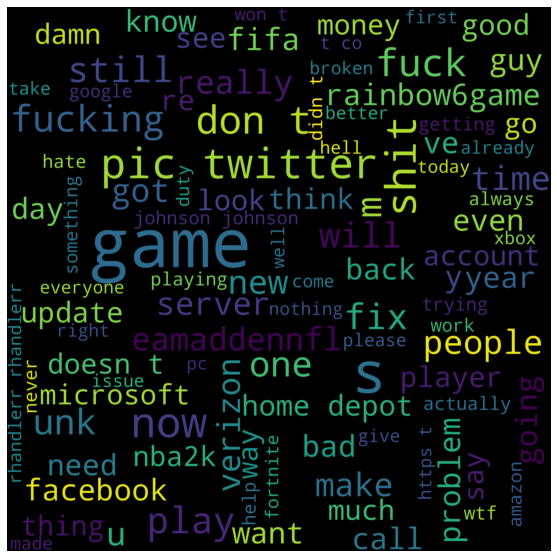

In [39]:
# Figure properties

plt.figure( figsize = (10,10) )

plt.imshow( wordcloud, interpolation = "bilinear" )

plt.axis( "off" )

plt.show()

## Irrelevant

In [40]:
#

word_cloud_text = ' '.join( train_data[ train_data["type"] == "Irrelevant" ].lower )

word_cloud_text

'appreciate the  sonic  concepts   praxis valenzuela and landa posas thread together in this talk  multimodal listening  soundwalks  borderlands frameworks  participatory action research  and testimonios      so many thoughtful and resonant intersections here      appreciate the  sound  concepts   practices that valenzuela and landa posas combine in this lecture  multimodal listening  soundwalks  borderland frameworks  participatory action research and testimonies  so many thoughtful and resonant intersections here  evaluate the  sound  concepts   concepts of valensela and landa pozas together in this conversation  multimodal listening  walks  border areas  joint action studies  etc  so many amazing and resonant intersections here  appreciate the  sonic  concepts   praxis valenzuela and moreno posas have together in this talk  multimodal listening  soundwalks  borderlands recordings  participatory field research  and testimonios  so many thoughtful and resonant intersections here    ap

In [41]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )


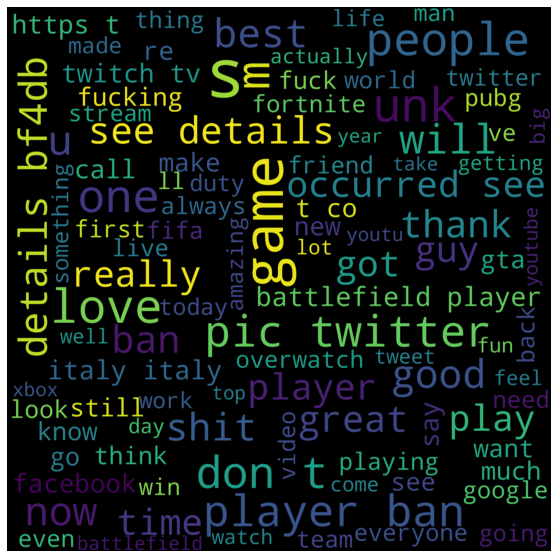

In [42]:
# Figure properties

plt.figure( figsize = (10, 10) )

plt.imshow( wordcloud, interpolation = "bilinear")

plt.axis("off")

plt.show()

## Neutral

In [43]:
#

word_cloud_text = ' '.join( train_data[ train_data["type"] == "Neutral" ].lower )

word_cloud_text

'rock hard la varlope  rare   powerful  handsome jackpot  borderlands 3  xbox  dlvr it rmtrgf   rock hard la varlope  rare   powerful  handsome jackpot  borderlands 3  xbox  dlvr it   rmtrgf rock hard la varlope  rare   powerful  handsome jackpot  borderlands 3  xbox  dfr it   rmtrgf rock hard la vita  rare but powerful  handsome jackpot  borderlands 1  xbox  dlvr it rmtrgf live rock   hard music la la varlope  rare   the powerful  live handsome i jackpot  borderlands 3   sega xbox   dlvr  from it   e rmtrgf i hard like me  rare london de  handsome 2011  borderlands 3  xbox  dlvr it rmtrgf check out this epic streamer    check out this epic streamer  watch this epic striptease  check out our epic streamer  check out this big epic streamer  check unk  this epic streamer  blaming sight for tardiness  a little bit of borderlands  i got called in early for work tomorrow so i can t make up time  sorry my loves    twitch tv punnisenpai a bit of borderland  i was called to work tomorrow morni

In [44]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )


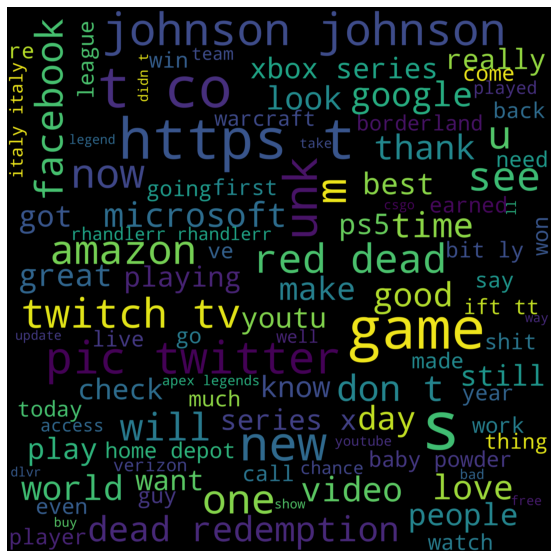

In [45]:
# Figure properties

plt.figure( figsize = (10, 10) )

plt.imshow( wordcloud, interpolation = "bilinear" )

plt.axis("off")

plt.show()

## The number of tweets 

In [57]:
#Count information per category

plot1 = train.groupby( by = ["information", "type"] ).count().reset_index()

plot1.head()

information        type    id  text  lower
0       Amazon  Irrelevant   192   186    192
1       Amazon    Negative   576   575    576
2       Amazon     Neutral  1236  1207   1236
3       Amazon    Positive   312   308    312
4  ApexLegends  Irrelevant   192   192    192

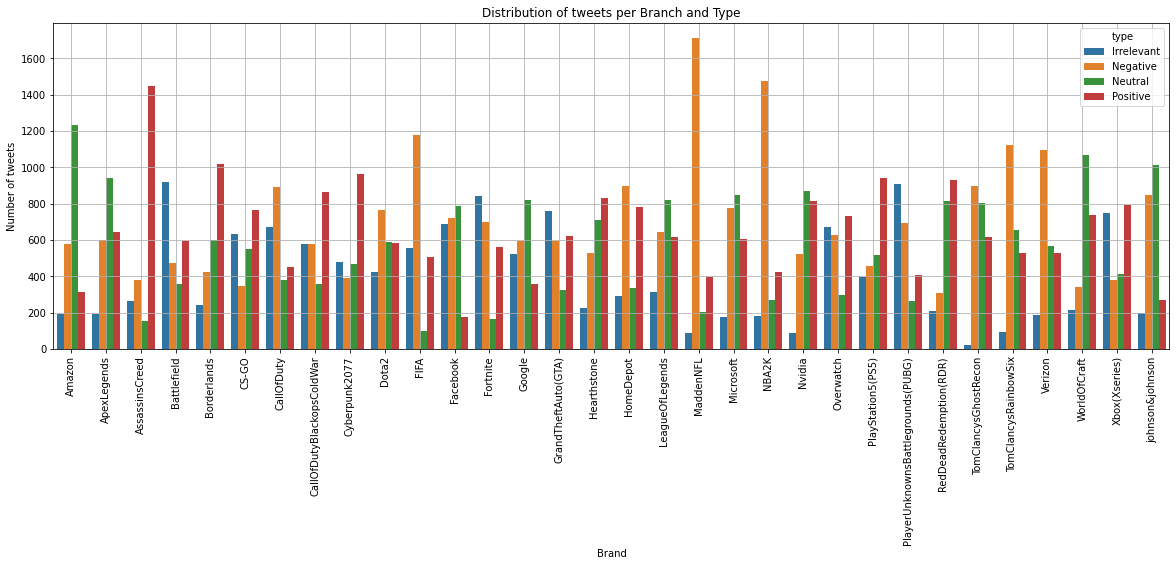

In [58]:
#Figure of comparison per branch

plt.figure( figsize = (20, 6) )

sns.barplot( data = plot1, x = "information", y = "id", hue = "type" )

plt.xticks( rotation = 90 )

plt.xlabel("Brand")

plt.ylabel("Number of tweets")

plt.grid()

plt.title("Distribution of tweets per Branch and Type")

plt.show()

# Text analysis

Con el texto limpio, se contó la cantidad inicial de tokens únicos para identificar la complejidad del modelo. 

Tal como se presenta, hay más de 30 mil palabras únicas.

In [59]:
# Text splitting

tokens_text = [ word_tokenize( str(word) ) for word in train_data.lower ]

tokens_text

[['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all'],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all'],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  'if',
  'you',
  'don',
  't',
  'know',
  'i',
  'am',
  'a',
  'huge',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  'so',
  'i',
  'decided',
  'to',
  'make',
  'myself',
  'a',
  'wallpaper',

In [62]:
#

tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [63]:
# Unique word counter

tokens_counter = [item for sublist in tokens_text for item in sublist]

print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [67]:
# Choosing english stopwords

stopwords_nltk = nltk.corpus.stopwords

stop_words = stopwords_nltk.words('english')

stop_words#[:5]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Logistic Regression model

Para el modelo de regresión utilizamos una regresión logística simple de la biblioteca `sklearn` junto con el enfoque Bag of Words (BoW). 

Este último método ayuda a clasificar y agrupar los datos relevantes para ayudar al modelo a identificar las tendencias adecuadas.

En este primer BoW, las palabras vacías se consideraron junto con un valor predeterminado ngram de 1.

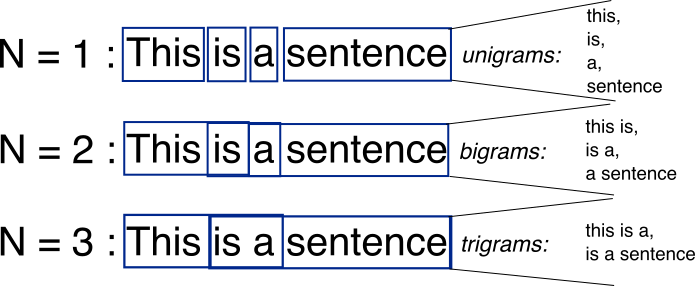

In [68]:
#Initial Bag of Words

bow_counts = CountVectorizer(
    tokenizer   = word_tokenize,
    stop_words  = stop_words, #English Stopwords
    ngram_range = (1, 1) #analysis of one word
)

bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7f86b1850820>)

**Luego, los datos principales se dividieron en conjuntos de datos de entrenamiento y de prueba junto con la codificación de las palabras utilizando el conjunto de datos de entrenamiento como referencia:**

In [69]:
#Train - Test splitting

reviews_train, reviews_test = train_test_split( train_data, test_size = 0.2, random_state = 0 )

In [70]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)

X_train_bow

<59745x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 650141 stored elements in Compressed Sparse Row format>

In [71]:
#Transformation of test dataset with train encoding

X_test_bow = bow_counts.transform(reviews_test.lower)

X_test_bow

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [72]:
#Labels for train and test encoding

y_train_bow = reviews_train['type']

y_train_bow

27749      Positive
22415       Neutral
44208      Positive
71737      Negative
41144       Neutral
            ...    
21243      Positive
45891       Neutral
42613    Irrelevant
43567    Irrelevant
68268      Negative
Name: type, Length: 59745, dtype: object

In [73]:
#Labels for train and test encoding

y_test_bow = reviews_test['type']

y_test_bow

28696       Neutral
51606       Neutral
19463      Positive
26251      Positive
55871      Negative
            ...    
26359      Positive
73612       Neutral
32084      Negative
70762       Neutral
44869    Irrelevant
Name: type, Length: 14937, dtype: object

In [74]:
# El número total de tuits de cada categoría muestra que los negativos y positivos son los más registrados 
# mientras que los irrelevantes son los menos registrados.
# Total of registers per category

y_train_bow.value_counts() / y_train_bow.shape[0]

type
Negative      0.302502
Positive      0.278115
Neutral       0.245192
Irrelevant    0.174190
Name: count, dtype: float64

In [75]:
# El número total de tuits de cada categoría muestra que los negativos y positivos son los más registrados 
# mientras que los irrelevantes son los menos registrados.
# Total of registers per category

y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [76]:
# Logistic regression

model1 = LogisticRegression( C = 1, solver = "liblinear", max_iter = 200 )

model1.fit( X_train_bow, y_train_bow )

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [77]:
# Prediction

train_pred = model1.predict(X_train_bow)

print("Accuracy: ", accuracy_score(y_train_bow, train_pred) * 100)

Accuracy:  88.04586157837477


In [78]:
# Prediction

test_pred = model1.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.50900448550578


In [79]:
# Validation data

X_val_bow = bow_counts.transform(val_data.lower)

y_val_bow = val_data['type']

In [80]:
#

X_val_bow

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [81]:
#

Val_res = model1.predict(X_val_bow)

print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  91.7


Finalmente, se utilizó otra Bolsa de Palabras. Este tuvo un n-grama de 4 sin clasificar las palabras vacías, utilizando toda la información disponible.

In [82]:
#Initial Bag of Words

bow_counts = CountVectorizer(
    tokenizer   = word_tokenize,
    stop_words  = stop_words, #English Stopwords
    ngram_range = (1, 4) #analysis of one word
)

bow_counts

CountVectorizer(ngram_range=(1, 4),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7f86b1850820>)

In [83]:
#Data labeling

X_train_bow = bow_counts.fit_transform(reviews_train.lower)

X_test_bow = bow_counts.transform(reviews_test.lower)

X_val_bow = bow_counts.transform(val_data.lower)

In [84]:
# Logistic regression

model1 = LogisticRegression( C = 0.9, solver = "liblinear", max_iter = 200 )#1500

model1.fit( X_train_bow, y_train_bow )

LogisticRegression(C=0.9, max_iter=200, solver='liblinear')

In [85]:
# Prediction

train_pred_2 = model1.predict(X_train_bow)

print("Accuracy: ", accuracy_score(y_train_bow, train_pred_2) * 100)

Accuracy:  95.54439702067118


In [86]:
# Prediction

test_pred_2 = model1.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  88.08328312244761


In [87]:
#

Val_res_2 = model1.predict(X_val_bow)

print("Accuracy: ", accuracy_score(y_val_bow, Val_res_2) * 100)

Accuracy:  97.1
